In [53]:
import pandas as pd

In [54]:
X_full =pd.read_csv("Train.csv",index_col='date_time',parse_dates=True)
X_test_full =pd.read_csv("Test.csv",index_col='date_time',parse_dates=True)

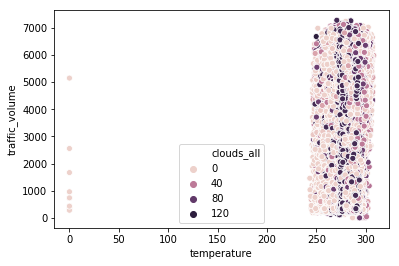

In [55]:
import seaborn as sns

sns.scatterplot(x=X_full["temperature"],y=X_full["traffic_volume"],hue=X_full["clouds_all"])


In [56]:
#sns.regplot(x=X_full["temperature"],y=X_full["traffic_volume"])

In [57]:
#sns.lmplot(x="temperature",y='traffic_volume',hue='clouds_all',data=X_full)

In [58]:
X_full.dropna(axis=0,subset=['traffic_volume'],inplace=True)

In [59]:
print(X_full.shape)
X_full.head()


(33750, 14)


,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
date_time,,,,,,,,,,,,,,
02-10-2012 9.00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
02-10-2012 10.00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
02-10-2012 11.00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
02-10-2012 12.00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
02-10-2012 13.00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [60]:
print(X_test_full.shape)
X_test_full.head()

(14454, 13)


,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
date_time,,,,,,,,,,,,,
2017-05-18 00:00:00,None,73,63,1,27,4,4,285.15,0.0,0,90,Rain,moderate rain
2017-05-18 00:00:00,None,251,63,1,27,4,4,285.15,0.0,0,90,Mist,mist
2017-05-18 00:00:00,None,75,56,1,0,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle
2017-05-18 01:00:00,None,98,56,1,351,2,2,284.79,0.0,0,90,Rain,heavy intensity rain
2017-05-18 01:00:00,None,283,56,1,351,1,1,284.79,0.0,0,90,Mist,mist


In [61]:
y=X_full.traffic_volume
X_full.drop(["traffic_volume"],axis=1,inplace=True)


In [62]:
X=X_full.copy()
X.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
date_time,,,,,,,,,,,,,
02-10-2012 9.00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds
02-10-2012 10.00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds
02-10-2012 11.00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds
02-10-2012 12.00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds
02-10-2012 13.00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds


In [63]:
print(X_full.shape)
print(X_test_full.shape)
print(X.shape)
print(y.shape)
print(X["is_holiday"].unique())

(33750, 13)
(14454, 13)
(33750, 13)
(33750,)
['None' 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']


In [64]:
from sklearn.model_selection import train_test_split as TTS
X_train,X_valid,y_train,y_valid=TTS(X,y,train_size=0.8,test_size=0.2,random_state=7)

### Label Encoding

In [65]:
object_cols=[col for col in X_train.columns if X_train[col].dtype=='object']
object_cols

['is_holiday', 'weather_type', 'weather_description']

In [66]:
for col in object_cols:
    
    print(col,set(X_train[col]),"\n",len(set((X_train[col]))))
    print("\n\n")

is_holiday {'Martin Luther King Jr Day', 'Memorial Day', 'Columbus Day', 'Washingtons Birthday', 'Thanksgiving Day', 'Labor Day', 'Christmas Day', 'State Fair', 'New Years Day', 'None', 'Veterans Day', 'Independence Day'} 
 12



weather_type {'Clouds', 'Rain', 'Haze', 'Snow', 'Smoke', 'Clear', 'Thunderstorm', 'Drizzle', 'Mist', 'Squall', 'Fog'} 
 11



weather_description {'drizzle', 'thunderstorm', 'thunderstorm with light rain', 'snow', 'broken clouds', 'light intensity drizzle', 'shower snow', 'sky is clear', 'shower drizzle', 'proximity thunderstorm with drizzle', 'heavy snow', 'light intensity shower rain', 'thunderstorm with heavy rain', 'few clouds', 'mist', 'sleet', 'very heavy rain', 'moderate rain', 'fog', 'Sky is Clear', 'thunderstorm with light drizzle', 'heavy intensity drizzle', 'overcast clouds', 'proximity thunderstorm', 'scattered clouds', 'proximity shower rain', 'light rain and snow', 'light rain', 'smoke', 'light shower snow', 'heavy intensity rain', 'thunderstorm 

In [67]:
for col in object_cols:
    
    print(col,set(X_valid[col]),"\n",len(set((X_valid[col]))))
    print("\n\n")

is_holiday {'Memorial Day', 'Thanksgiving Day', 'Christmas Day', 'State Fair', 'None', 'Veterans Day', 'Independence Day'} 
 7



weather_type {'Clouds', 'Rain', 'Haze', 'Snow', 'Smoke', 'Clear', 'Thunderstorm', 'Drizzle', 'Mist', 'Fog'} 
 10



weather_description {'drizzle', 'thunderstorm', 'thunderstorm with light rain', 'snow', 'broken clouds', 'light intensity drizzle', 'sky is clear', 'proximity thunderstorm with drizzle', 'heavy snow', 'light intensity shower rain', 'thunderstorm with heavy rain', 'few clouds', 'mist', 'sleet', 'very heavy rain', 'moderate rain', 'fog', 'Sky is Clear', 'thunderstorm with light drizzle', 'heavy intensity drizzle', 'overcast clouds', 'proximity thunderstorm', 'scattered clouds', 'proximity shower rain', 'light rain and snow', 'light rain', 'smoke', 'light shower snow', 'thunderstorm with drizzle', 'heavy intensity rain', 'freezing rain', 'haze', 'thunderstorm with rain', 'proximity thunderstorm with rain', 'light snow'} 
 35





In [121]:

#X=X_full.select_dtypes(exclude=['object'])
#X=X_full[["temperature"]]#,"clouds_all"]]#,"snow_p_h","rain_p_h"]]

#X_test=X_test_full.select_dtypes(exclude=['object'])
X_test=X_test_full.copy()


In [124]:
from sklearn.preprocessing import LabelEncoder

labencoder=LabelEncoder()

for col in set(object_cols):
    X_train.loc[:,col]=labencoder.fit_transform(X_train.loc[:,col])
    X_valid.loc[:,col]=labencoder.transform(X_valid.loc[:,col])
    X_test.loc[:,col]=labencoder.transform(X_test.loc[:,col])


In [125]:
X_valid.shape

(6750, 13)

In [126]:
X.head()


,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
date_time,,,,,,,,,,,,,
27-03-2014 6.00,7,126,86,2,270,5,5,276.700,0.25,0.0,90,6,13
08-07-2015 3.00,7,32,64,2,141,7,7,285.480,0.00,0.0,1,0,27
19-07-2016 2.00,7,232,93,2,320,2,2,297.888,0.00,0.0,0,0,1
21-11-2013 6.00,7,231,61,7,320,4,4,276.110,0.00,0.0,90,5,17
07-05-2016 14.00,7,69,75,1,259,1,1,292.970,0.00,0.0,75,1,2


In [106]:
X_train.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
date_time,,,,,,,,,,,,,
27-03-2014 6.00,7,126,86,2,270,5,5,276.700,0.25,0.0,90,6,13
08-07-2015 3.00,7,32,64,2,141,7,7,285.480,0.00,0.0,1,0,27
19-07-2016 2.00,7,232,93,2,320,2,2,297.888,0.00,0.0,0,0,1
21-11-2013 6.00,7,231,61,7,320,4,4,276.110,0.00,0.0,90,5,17
07-05-2016 14.00,7,69,75,1,259,1,1,292.970,0.00,0.0,75,1,2


In [107]:
print(X_train.shape)
missing_val_count_by_column = (X_train.isnull().sum())

print(missing_val_count_by_column)

(27000, 13)
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
dtype: int64


In [108]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_absolute_error as MAE

def rand_forest(X_train,X_valid,y_train,y_valid,n):
    model=RFR(n_estimators=n,random_state=1)
    model.fit(X_train,y_train)
    preds=model.predict(X_valid)
    return (MAE(y_valid,preds))

In [109]:
from sklearn import linear_model
def linear_reg(X_train,X_valid,y_train,y_valid):
    regr=linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    lpreds=regr.predict(X_valid)
    return MAE(y_valid,lpreds)


In [110]:
#trials=[600,700,800]
#for n in trials:
#   print(n,":\t",rand_forest(X_train,X_valid,y_train,y_valid,n))

In [111]:
X_train.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
date_time,,,,,,,,,,,,,
27-03-2014 6.00,7,126,86,2,270,5,5,276.700,0.25,0.0,90,6,13
08-07-2015 3.00,7,32,64,2,141,7,7,285.480,0.00,0.0,1,0,27
19-07-2016 2.00,7,232,93,2,320,2,2,297.888,0.00,0.0,0,0,1
21-11-2013 6.00,7,231,61,7,320,4,4,276.110,0.00,0.0,90,5,17
07-05-2016 14.00,7,69,75,1,259,1,1,292.970,0.00,0.0,75,1,2


In [112]:
temp_model=RFR(n_estimators=100,random_state=1)
temp_model.fit(X_train,y_train)
preds_test=temp_model.predict(X_valid)
print(MAE(y_valid,preds_test))

1511.5614725925925


In [113]:
print(linear_reg(X_train,X_valid,y_train,y_valid))

1884.8979042188707


In [114]:
from xgboost import XGBRegressor

def XGB(X_train,X_valid,y_train,y_valid):
    model=XGBRegressor(n_estimators=1000,learning_rate=0.9)
    model.fit(X_train,y_train,early_stopping_rounds=6,eval_set=[(X_valid,y_valid)],verbose=False)
    xpreds=model.predict(X_valid)
    return MAE(y_valid,xpreds)

In [115]:
print(XGB(X_train,X_valid,y_train,y_valid))

C:\Users\Saranga\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:01:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1684.4436502821181


In [128]:
X=pd.concat([X_train,X_valid],axis=0)
X_test.shape

(14454, 13)

In [129]:
final_model=RFR(n_estimators=100,random_state=1)
final_model.fit(X,y)
preds_test=final_model.predict(X_test)
output=pd.DataFrame({'date_time':X_test.index,'traffic_volume':preds_test})
output.to_csv("submission3.csv",index=False)
output

,date_time,traffic_volume
0,2017-05-18 00:00:00,3310.84
1,2017-05-18 00:00:00,3390.53
2,2017-05-18 00:00:00,3586.50
3,2017-05-18 01:00:00,3203.90
4,2017-05-18 01:00:00,2832.82
5,2017-05-18 02:00:00,3174.14
6,2017-05-18 02:00:00,3303.19
7,2017-05-18 02:00:00,3826.48
8,2017-05-18 03:00:00,3534.07
9,2017-05-18 03:00:00,2999.04
